In [289]:
# For Data Pre-processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For Feature Engineering
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import ExtraTreesClassifier

# For metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# For Model Development
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [211]:
df = pd.read_csv('../data/diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [212]:
df.shape

(520, 17)

In [213]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [214]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [215]:
# check if any column has "na" or "not available" data
df.isna().any()

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden weight loss    False
weakness              False
Polyphagia            False
Genital thrush        False
visual blurring       False
Itching               False
Irritability          False
delayed healing       False
partial paresis       False
muscle stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool

In [216]:
# check if total number of "na" or "not available" data, in each column 
df.isna().sum()  

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [217]:
# check if any missing values exist in the coluns
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [218]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [220]:
# to know if our dataset is balanced or not
df['class'].value_counts().to_frame()

,class
Positive,320
Negative,200


In [221]:
pd.DataFrame(list(dict(df['class'].value_counts()).items()),columns=['Class','Count'])

,Class,Count
0,Positive,320
1,Negative,200


<Axes: title={'center': 'Plot of Distribution of Data Per Class/Label'}>

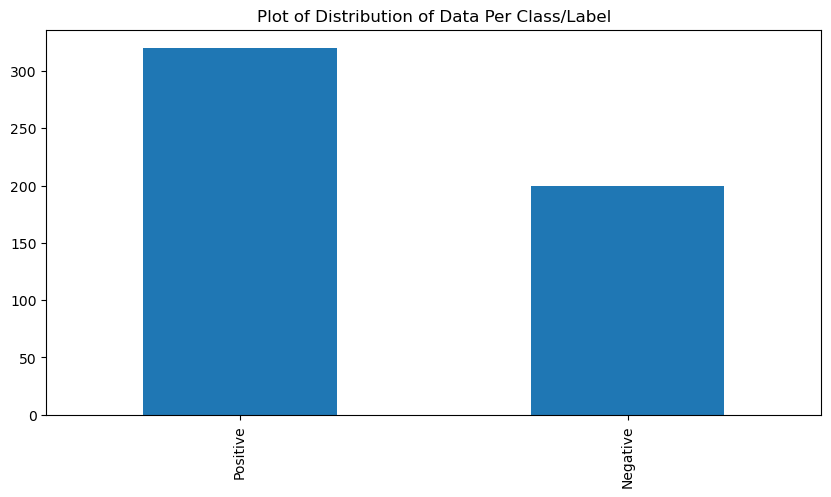

In [222]:
# plot of distribution of data per class/label (using matplotlib)
plt.figure(figsize=(10,5))
plt.title('Plot of Distribution of Data Per Class/Label')
df['class'].value_counts().plot(kind='bar')


<function matplotlib.pyplot.show(close=None, block=None)>

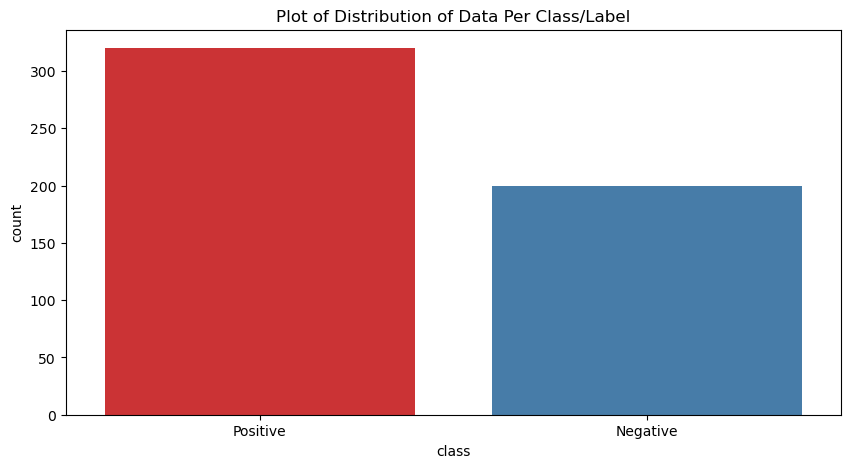

In [223]:
# plot of distribution of data per class/label (using seaborn)
plt.figure(figsize=(10,5))
plt.title('Plot of Distribution of Data Per Class/Label')
sns.countplot(x='class', data=df, palette='Set1')
plt.show

## You can also do similar for gender

In [224]:
labels = ['less than 10', '10-20','20-30','30-40','40-50','50-60','60-70','70-80','80 and more']
bins = [0,10,20,30,40,50,60,70,80,90]
freq_df = df.groupby(pd.cut(df['Age'], bins=bins, labels=labels)).size()
freq_df.head()

Age
less than 10      0
10-20             1
20-30            44
30-40           123
40-50           145
dtype: int64

In [225]:
freq_df = freq_df.reset_index(name='count')
freq_df.head()

,Age,count
0,less than 10,0
1,10-20,1
2,20-30,44
3,30-40,123
4,40-50,145


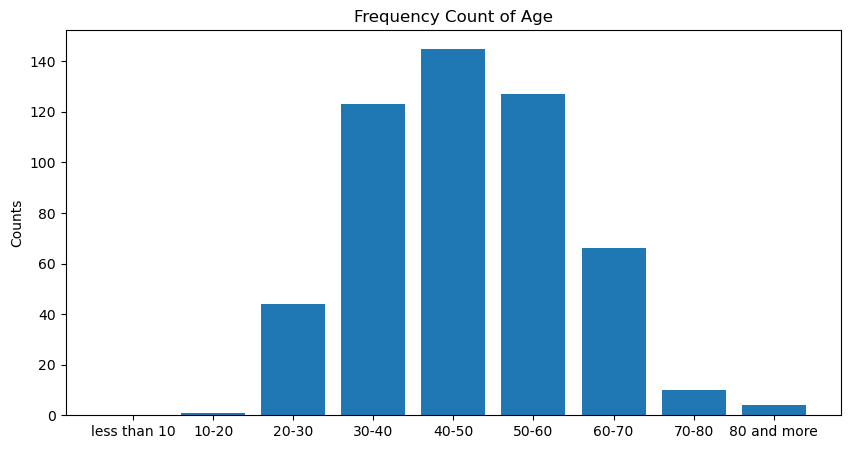

In [226]:
# Plot of distribution of data (Age)
plt.figure(figsize=(10,5))
plt.bar(freq_df['Age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

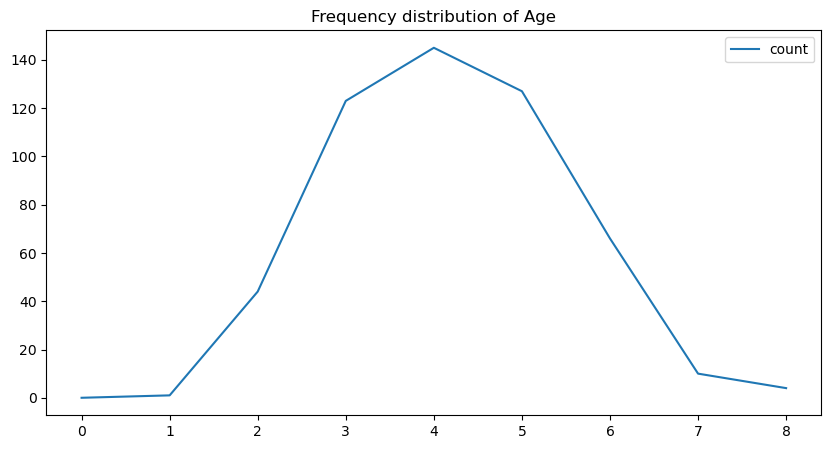

In [227]:
# Plot of distribution of data (Age) - Line plot
freq_df.plot(kind='line',figsize=(10,5))
plt.title('Frequency distribution of Age')
plt.show()

<Axes: xlabel='Age'>

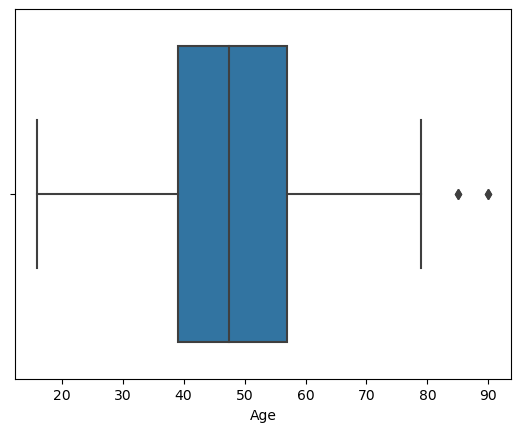

In [228]:
# Find Outliers in Age using Boxplot
sns.boxplot(df, x='Age')

In [229]:
list(df.columns)

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class']

In [230]:
def encode_data(df):
    for col in df.columns:
        if col != 'Age':
            df[col] = df[col].map({'Yes': 1, 'No': 0,'Male':1,'Female':0,'Positive':1,'Negative':0})
    return df

encoded_df = encode_data(df)
encoded_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [231]:
encoded_df.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object

In [232]:
encoded_df.corr()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


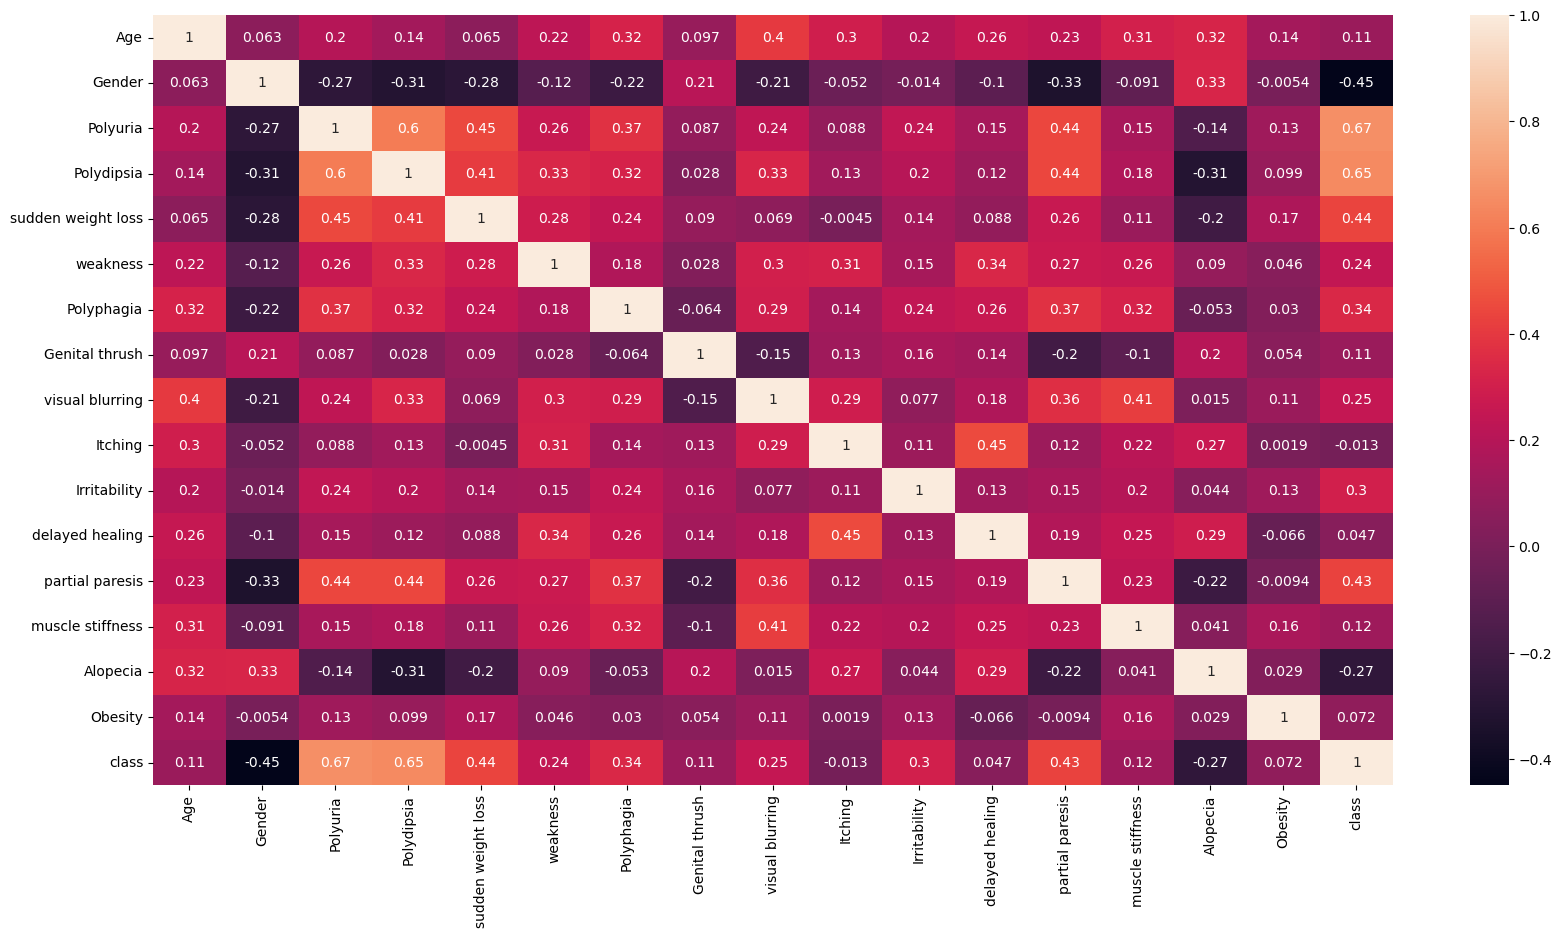

In [233]:
# Plot Correlation with Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(encoded_df.corr(),annot=True)
plt.show()

<Axes: >

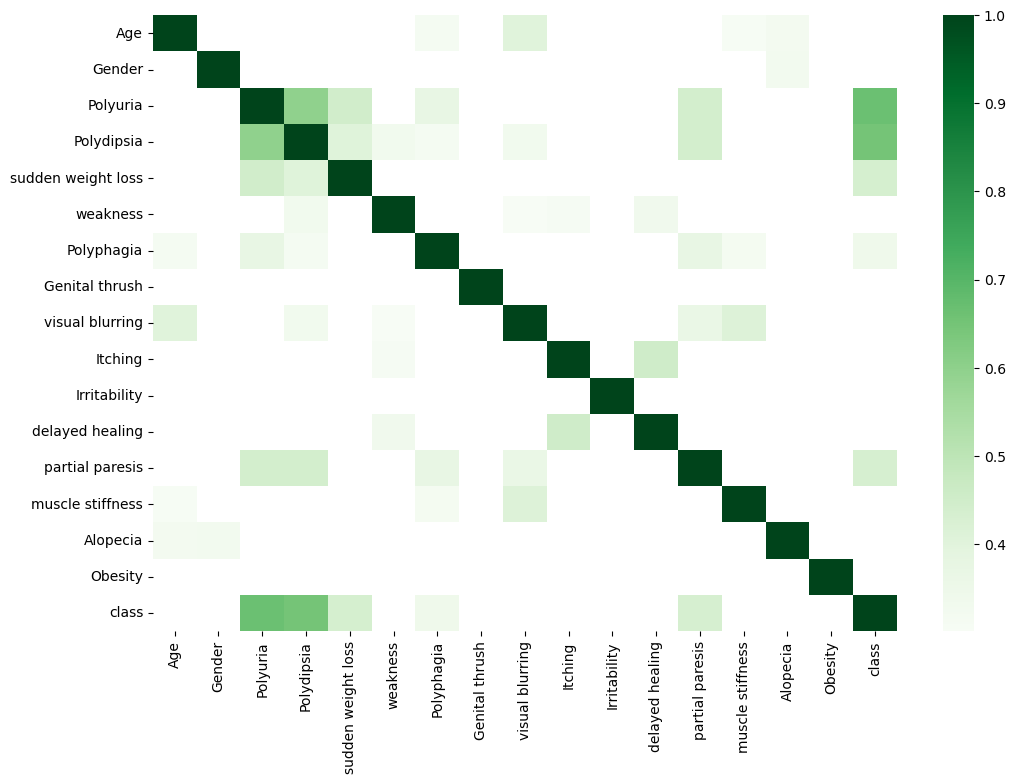

In [234]:
corr_matrix = encoded_df.corr()
highest_corr = corr_matrix[corr_matrix >= 0.3]
plt.figure(figsize=(12,8))
sns.heatmap(highest_corr, cmap='Greens')


In [235]:
# List Features with the highest correlation coefficient
s= corr_matrix.abs().unstack()
top_features_per_correlation = s.sort_values(kind='quicksort')

In [236]:
print(top_features_per_correlation)

Obesity             Itching               0.001894
Itching             Obesity               0.001894
                    sudden weight loss    0.004516
sudden weight loss  Itching               0.004516
Obesity             Gender                0.005396
                                            ...   
Polydipsia          Polydipsia            1.000000
Polyuria            Polyuria              1.000000
Gender              Gender                1.000000
Obesity             Obesity               1.000000
class               class                 1.000000
Length: 289, dtype: float64


In [237]:
X = encoded_df.drop(['class'],axis='columns')
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [238]:
y = encoded_df['class']
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [239]:
## Feature Engineering

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import ExtraTreesClassifier

In [240]:
skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(X,y)

In [241]:
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns = ['Feature_Score'])
feature_scores

,Feature_Score
0,18.845767
1,38.747637
2,116.184593
3,120.785515
4,57.749309
5,12.724262
6,33.198418
7,4.914009
8,18.124571
9,0.047826


In [242]:
feature_column_names =pd.DataFrame(X.columns, columns=['Feature_name'])
feature_column_names

,Feature_name
0,Age
1,Gender
2,Polyuria
3,Polydipsia
4,sudden weight loss
5,weakness
6,Polyphagia
7,Genital thrush
8,visual blurring
9,Itching


In [243]:
best_feature_df = pd.concat([feature_scores,feature_column_names], axis=1)
best_feature_df

,Feature_Score,Feature_name
0,18.845767,Age
1,38.747637,Gender
2,116.184593,Polyuria
3,120.785515,Polydipsia
4,57.749309,sudden weight loss
5,12.724262,weakness
6,33.198418,Polyphagia
7,4.914009,Genital thrush
8,18.124571,visual blurring
9,0.047826,Itching


In [244]:
best_feature_df.sort_values(by='Feature_Score', ascending=False)

,Feature_Score,Feature_name
3,120.785515,Polydipsia
2,116.184593,Polyuria
4,57.749309,sudden weight loss
12,55.314286,partial paresis
1,38.747637,Gender
10,35.334127,Irritability
6,33.198418,Polyphagia
14,24.402793,Alopecia
0,18.845767,Age
8,18.124571,visual blurring


In [245]:
# Get the best
# The higher the number the more important the feature
best_feature_df.nlargest(10,'Feature_Score')

,Feature_Score,Feature_name
3,120.785515,Polydipsia
2,116.184593,Polyuria
4,57.749309,sudden weight loss
12,55.314286,partial paresis
1,38.747637,Gender
10,35.334127,Irritability
6,33.198418,Polyphagia
14,24.402793,Alopecia
0,18.845767,Age
8,18.124571,visual blurring


In [246]:
# List top n best columns
best_feature_df.nlargest(10,'Feature_Score')['Feature_name'].unique()

array(['Polydipsia', 'Polyuria', 'sudden weight loss', 'partial paresis',
       'Gender', 'Irritability', 'Polyphagia', 'Alopecia', 'Age',
       'visual blurring'], dtype=object)

In [247]:
# Using ExtraTreesClassifier
et_clf = ExtraTreesClassifier()
et_clf.fit(X,y)

ExtraTreesClassifier()

In [248]:
# Print importance scores
print(et_clf.feature_importances_)

[0.05304362 0.10151711 0.22566151 0.21262509 0.05436857 0.01943917
 0.02949048 0.02428662 0.03083599 0.03221639 0.04566838 0.03858878
 0.04784025 0.0265816  0.03845685 0.0193796 ]


In [249]:
# Convert to a Dataframe
feature_importance_df = pd.Series(et_clf.feature_importances_,index=X.columns)

In [250]:
feature_importance_df.head()

Age                   0.053044
Gender                0.101517
Polyuria              0.225662
Polydipsia            0.212625
sudden weight loss    0.054369
dtype: float64

<Axes: >

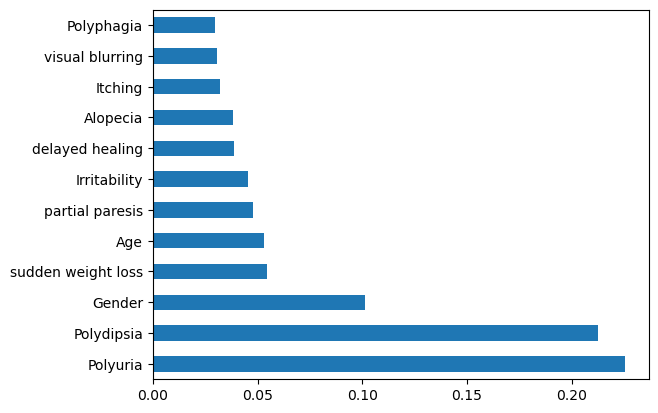

In [251]:
feature_importance_df.nlargest(12).plot(kind='barh')

In [252]:
print(X.columns)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [253]:
# Split Dataset into 2
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [254]:
# Shape of Dataset
print('original data', encoded_df.shape)
print('training data', x_train.shape)
print('testing data', y_test.shape)

original data (520, 17)
training data (364, 16)
testing data (156,)


In [268]:
# Using LogisticRegression Estimator to Build A Model
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [299]:
# Check Model Acurracy
# Method 1
lr_model.score(x_test,y_test)

0.8910256410256411

In [300]:
# Check Model Accuracy 
y_pred = lr_model.predict(x_test)

In [301]:
# Using Accuracy Score to check for accuracy by comparing with the predicted values and the test values
print(f'Accuracy of LR Model {accuracy_score(y_test,y_pred)}')

Accuracy of LR Model 0.8910256410256411


In [302]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [303]:
target_names = ["Negative(0)","Positive(1)"]

In [304]:
# Classification Report
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.81      0.95      0.88        63
 Positive(1)       0.96      0.85      0.90        93

    accuracy                           0.89       156
   macro avg       0.89      0.90      0.89       156
weighted avg       0.90      0.89      0.89       156



In [305]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[60,  3],
       [14, 79]], dtype=int64)

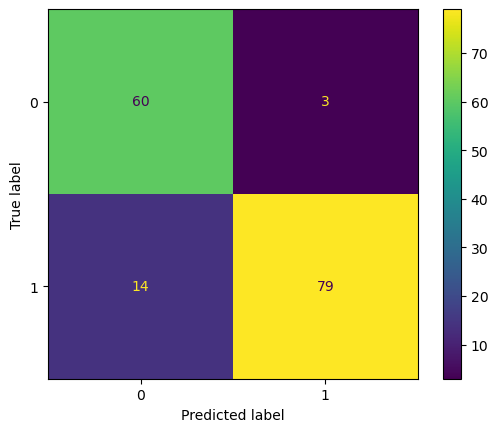

In [306]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [307]:
#Kfold cross validation score of the model
#Evaluate model using cross validation of Kfolds

def cross_validate_model(model_estimator, X,y,cv):
    scores = cross_val_score(model_estimator, X,y, scoring='accuracy', cv=cv)
    result = f'Mean Accuracy: {np.mean(scores)} Standard_Deviation: {np.std(scores)}'
    return result

In [308]:
# Cross Validation for LR
cv_scores_for_lr_model = cross_validate_model(LogisticRegression(),X,y,5)

In [309]:
print(cv_scores_for_lr_model)

Mean Accuracy: 0.926923076923077 Standard_Deviation: 0.036284542815602304


In [310]:
from sklearn.metrics import f1_score
f1_score_for_lr_model = f1_score(y_test,y_pred,average='macro')
f1_score_for_lr_model

0.8893847758081335

In [311]:
import joblib

In [315]:
filename = 'logistic_regression_model_diabetes_1_13_2024.pkl'
with open(filename, 'wb') as model_file_dt:
    joblib.dump(lr_model, model_file_dt)

In [320]:
!pip install eli5

     ------------------------------------ 216.2/216.2 kB 573.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107768 sha256=9dde4dde12d71f910d9a991a2fe93da74b12cdb83a61fc55e3bf1b7fbc803db3
  Stored in directory: c:\users\okafo\appdata\local\pip\cache\wheels\79\6c\4b\13ea3238d017bc19711b4312359e2c95be91a1a9d60d949572
Successfully built eli5


In [321]:
import eli5

In [322]:
X.columns.tolist()

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

In [323]:
target_names

['Negative(0)', 'Positive(1)']

In [330]:
# Shiw how each feature contributes
eli5.show_weights(lr_model,feature_names=X.columns.tolist(),target_names=target_names) # "target_names=target_names" is optional

Weight?,Feature
+2.769,Polydipsia
+2.572,Polyuria
+1.280,Irritability
+0.992,partial paresis
+0.859,Genital thrush
+0.797,Polyphagia
+0.574,sudden weight loss
+0.573,visual blurring
+0.345,weakness
+0.054,<BIAS>


In [333]:
# Let us make a prediction an interpret it

In [334]:
x_test.iloc[7]

Age                   45
Gender                 1
Polyuria               0
Polydipsia             0
sudden weight loss     1
weakness               1
Polyphagia             1
Genital thrush         1
visual blurring        0
Itching                1
Irritability           0
delayed healing        1
partial paresis        0
muscle stiffness       0
Alopecia               0
Obesity                0
Name: 3, dtype: int64

In [357]:
# Let us predict on X_test[7]
exp = np.array([x_test.iloc[7]])   ## A way to use numpy on your dataframe 
exp                                ## You can also do x_test.iloc[7:10]   or numpy operations

array([[45,  1,  0,  0,  1,  1,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0]],
      dtype=int64)

In [358]:
np.array(x_test.iloc[7]).reshape(1,-1)

array([[45,  1,  0,  0,  1,  1,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0]],
      dtype=int64)

In [360]:
lr_model.predict(exp)

array([0], dtype=int64)

In [362]:
# Check Prediction Probability
lr_model.predict_proba(exp)

array([[0.87002116, 0.12997884]])

In [363]:
# Show how each feature contributes
eli5.show_prediction(lr_model,x_test.iloc[7],feature_names=X.columns.tolist(),target_names=target_names)
# The reason our model gave us Negative for our prediction 
# is because the most important features of polydipsia, 
# polyphagia and sudden weight loss had low contribution values 